# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Load Data Set

In [2]:
df = pd.read_csv('Admission_Predict.csv')
# take a look at the dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
print (df.shape)

(400, 9)


# Cleaning


In [6]:
#Data engineering
#check for Null vales
df.isnull().values.any()

False

In [7]:
df.dtypes


Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
df = df.rename(columns={"GRE Score" : "GRE_Score", "TOEFL Score" : "TOEFL_Score", "University Rating" : "University_Rating", "Chance of Admit" : "Admission"})

df.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


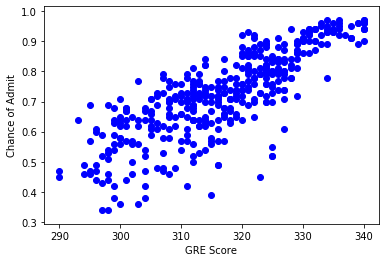

In [9]:
plt.scatter(df.GRE_Score, df.Admission, color='blue')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.show()

# Model Training
### Train/Test split# 

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split



Scores = df[['GRE_Score','TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
Admission = df['Admission']

x_train, x_test, y_train, y_test = train_test_split(Scores,Admission, random_state = 1)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 7)
(100, 7)
(300,)
(100,)


In [12]:
x_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
82,320,110,5,5.0,4.5,9.22,1
367,311,98,1,1.0,2.5,7.46,0
179,307,102,3,3.0,3.0,8.27,0
27,298,98,2,1.5,2.5,7.50,1
89,316,109,4,4.5,3.5,8.76,1


In [13]:

from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg_model = linReg.fit(x_train, y_train)

In [14]:
print(linReg.intercept_)
print(linReg.coef_)

-1.1134215918214623
[ 0.00142101  0.00285389  0.00789659 -0.00257597  0.02084557  0.11401394
  0.02857746]


In [15]:
y_hat = linReg.predict(x_test)
print(x_test)
print(y_test)

     GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research
398        312          103                  3  3.5  4.0  8.78         0
125        300          100                  3  2.0  3.0  8.66         1
328        324          112                  4  4.0  3.5  8.77         1
339        324          107                  5  3.5  4.0  8.66         1
172        322          110                  4  4.0  5.0  9.13         1
..         ...          ...                ...  ...  ...   ...       ...
300        309          106                  2  2.5  2.5  8.00         0
277        320          101                  2  2.5  3.0  8.62         0
289        313          109                  3  4.0  3.5  9.00         0
260        327          108                  5  5.0  3.5  9.13         1
173        323          113                  4  4.0  4.5  9.23         1

[100 rows x 7 columns]
398    0.67
125    0.64
328    0.80
339    0.81
172    0.86
       ... 
300    0.62
277    0.70
289 

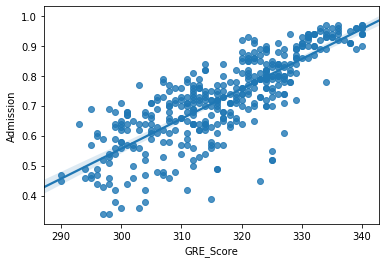

In [17]:
import seaborn as sns
sns.regplot(x='GRE_Score', y = 'Admission', data = df)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score


mean_squared_error(y_test, y_hat) 

0.004183757026495226

In [20]:
r2_score(y_test, y_hat)

0.8163951846360176